
#Time series forecasting using ARIMA model for prediction of temperature in uttar pradesh based on previous trends.

In [28]:
import numpy as np
import pandas as pd
from pandas import Series
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
import math
import csv
import json
import os
warnings.filterwarnings('ignore')
%matplotlib inline
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

In [29]:
TempDf=pd.read_csv("Data_Set2.csv",parse_dates=["Year"], index_col="Year")
TempDf.head(3)

,Temperature
Year,
1960-01-01,24.29
1961-01-01,24.00
1962-01-01,24.04


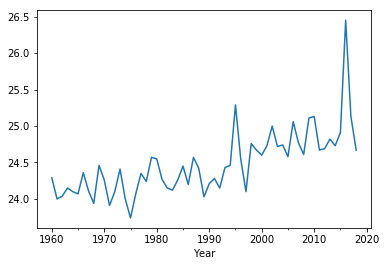

In [30]:
TempDf["Temperature"].plot()

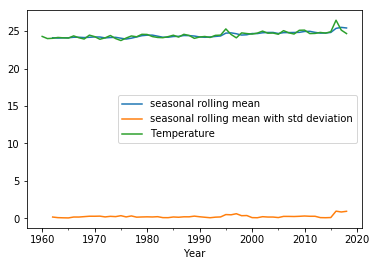

In [31]:
TempDf["Temperature"].rolling(3).mean().plot(label='seasonal rolling mean')
TempDf["Temperature"].rolling(3).std().plot(label='seasonal rolling mean with std deviation')
TempDf["Temperature"].plot()
plt.legend()

In [32]:
TempDataForADFC = pd.read_csv("Data_Set2.csv")
TempDataForADFC =TempDataForADFC.set_index('Year')
DickyFullerStats = adfuller(list(TempDataForADFC['Temperature']))
print(' Statistic Value = ',DickyFullerStats[0],'\n','5% Critical Value = ',DickyFullerStats[4]['5%'])

 Statistic Value =  0.8450924348490602 
 5% Critical Value =  -2.920142229157715


In [6]:
if DickyFullerStats[0]> DickyFullerStats[4]['5%']:
    print ('Time series is not stationary')
else:
    print ('time series is stationary')

Time series is not stationary


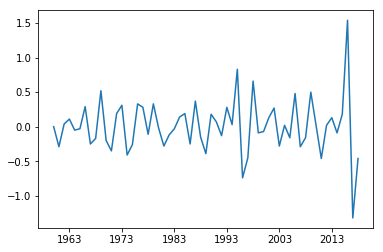

In [7]:
FirstOrderdif=TempDf.diff().fillna(0)
plt.plot(FirstOrderdif)

In [8]:
FirstDifResult = adfuller(list(FirstOrderdif['Temperature']))
print('Statistic Value= ',FirstDifResult[0],'\n','5% Critical Value = ',FirstDifResult[4]['5%'])
if FirstDifResult[0]> FirstDifResult[4]['5%']:
    print ('Time series is not stationary')
else:
    print ('Time series is stationary')

Statistic Value=  -6.3228785078505005 
 5% Critical Value =  -2.9178502070837
Time series is stationary


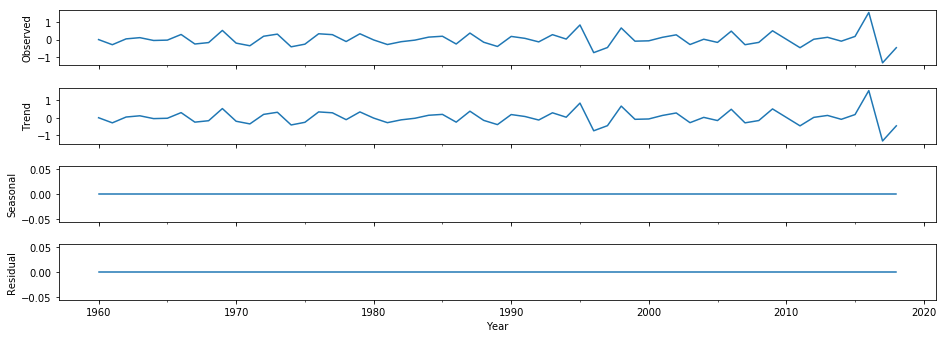

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
DecompositionValues=seasonal_decompose(FirstOrderdif,model='add',filt=None,freq=1,two_sided=True)
DecompositionValues.plot().set_size_inches( 15,5)

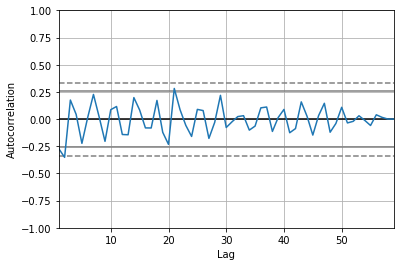

In [10]:
AutoResampledDif = FirstOrderdif.resample('AS').mean()
autocorrelation_plot(AutoResampledDif)
pyplot.show()

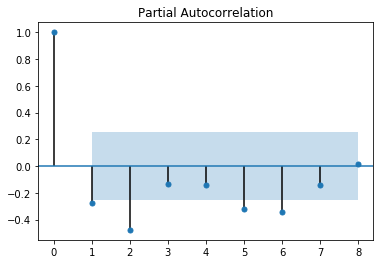

In [11]:
PartialAC=plot_pacf(AutoResampledDif,lags=8)

In [12]:
TempModel = ARIMA(FirstOrderdif,order=(4,1,1))
FitModel=TempModel.fit()
print(FitModel.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.Temperature   No. Observations:                   58
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -17.509
Method:                       css-mle   S.D. of innovations              0.307
Date:                Thu, 13 Dec 2018   AIC                             49.018
Time:                        10:05:06   BIC                             63.441
Sample:                    01-01-1961   HQIC                            54.636
                         - 01-01-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0010      0.001      1.124      0.266      -0.001       0.003
ar.L1.D.Temperature    -0.5811      0.132     -4.396      0.000      -0.840      -0.322
ar.L2.D.Temperat

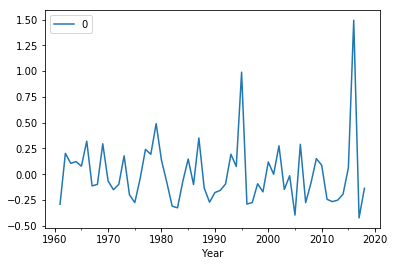

In [13]:
residuals=DataFrame(FitModel.resid)
residuals.plot()

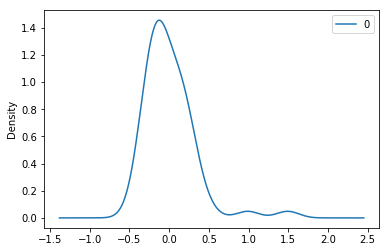

In [14]:
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

In [15]:
print(residuals.describe())

               0
count  58.000000
mean    0.005125
std     0.318555
min    -0.423651
25%    -0.189435
50%    -0.081802
75%     0.144338
max     1.493767


In [16]:
df=pd.read_csv("Data_Set2.csv",parse_dates=["Year"], index_col="Year")
df.head()

,Temperature
Year,
1960-01-01,24.29
1961-01-01,24.00
1962-01-01,24.04
1963-01-01,24.15
1964-01-01,24.10


In [17]:
series=df.copy()
X = series.values
Y = series.index
size=int(len(X)*0.85)
train, test=X[0:size], X[size:len(X)]
ytrain, ytest=Y[0:size], Y[size:len(X)]
SizeOfTestData = len(test)

In [18]:
ArimaModel=ARIMA(train,order=(3,1,1))
FittedArimaModel=ArimaModel.fit()
forecast = FittedArimaModel.forecast(SizeOfTestData)[0]

In [19]:
prediction = list()
for i in range (SizeOfTestData):
    prediction.append(forecast[i])
    print('Predicted=%.2f expected=%.2f' %(forecast[i],test[i]))

Predicted=24.91 expected=25.13
Predicted=24.71 expected=24.67
Predicted=24.86 expected=24.69
Predicted=24.91 expected=24.82
Predicted=24.84 expected=24.73
Predicted=24.86 expected=24.91
Predicted=24.91 expected=26.45
Predicted=24.91 expected=25.13
Predicted=24.91 expected=24.67


In [20]:
testsum = test.sum()
forecastsum = forecast.sum()
error=mean_squared_error(test,forecast)
print('Test RMSE:%.3f' % math.sqrt(error))

Test RMSE:0.535


In [21]:
error_per=(abs(testsum-forecastsum)/testsum)*100
print (error_per,"%")

0.6129015304091346 %


In [22]:
dz = pd.DataFrame({"Temperature":prediction})
dz = dz.set_index('Temperature')
dz.to_csv('file_path2.csv')

In [23]:
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

In [24]:
dfz=pd.read_csv("file_path2.csv")

In [25]:
train, test=df['Temperature'][0:size], df['Temperature'][size:len(X)]
ytrain, ytest=Y[0:size], Y[size:len(X)]

In [26]:
def plotRegression(xTest,yTest, regressor):
    traceTest = go.Bar(
        y = xTest,
        x = yTest,
        name = 'Testing Line'
    )

    tracePred = go.Bar(
        y = regressor, 
        x = yTest,
        name = 'Prediction Line'
    )
    
    data = [traceTest, tracePred]
    layout = dict(
        title = 'Model',
        xaxis = dict(
                title = 'Year'
        ),
        yaxis = dict(
            title = 'Temp'
        ),
    )
    
    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)

In [27]:
plotRegression(test,ytest, list(dfz['Temperature']))